In [1]:
import pyramses
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset, zoomed_inset_axes)
from matplotlib import rc
import pandas as pd
import datetime
import seaborn as sns
import json, codecs
import os
# from importnb import Notebook
# with Notebook(): 
#     from CIGRE18_multisim import VAR
# print(VAR)

# Set plot options
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
cm = 1/2.54
sns.set_context("paper", font_scale = 0.7, rc={"grid.linewidth": 0.6})
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)
palette = ["#1269b0","#a8322d", "#91056a", '#edb120','#72791c', '#6f6f64', '#007a96', '#1f407a','#485a2c']
# sns.set_palette(palette)
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

In [2]:
# Current date

today = datetime.date.today()
date = today
directory = ".\\" +  str(date) + "\\"
# KP_P = np.linspace(0,2,11)
# Tp2 = [0, 1]
# Loop over the different loads
atls = ['TL1', 'TL11', 'TL15', 'TL16', 'TL17', 'TL18'] 
# Loop over the different files
names = ['PV_help', 'no_PV_help']

# # names_hyst = []

# # VAR = KP_P
# # replace_str = "KP_P"
# var_path = ".\\" + str(today) + "\\var.json"
# obj_text = codecs.open(var_path, 'r', encoding='utf-8').read()
# VAR = json.loads(obj_text)
# var_str = list(VAR.keys())[0]

# out_dir = ".\\" + str(today) + "\\" + var_str + "\\"
# # Get the parameters
# with open(out_dir + 'parameters.json', 'r') as openfile:
#     parameters = json.load(openfile)
    

# fig_title = var_str + ' variation'
# fig_name = var_str + ' variation'
# for parameter in parameters:
#     fig_title += "; " + parameter + "= " + str(parameters[parameter])
#     fig_name += " " + parameter + str(parameters[parameter])
# # print(title)

# for i,var in enumerate(VAR[var_str]):
#     names.append('out_' + var_str + str(i))
#     # names_hyst.append('out_hyst' + str(i))

In [3]:
# Fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2, figsize =(15*cm,12.5*cm), sharex=True) 
# Fig.suptitle("\detokenize{"+ fig_title +"}")
# ext1 = []
# ext2 = []
# z_order = 100
# start = 0
# cut_end = 0
# end = len(VAR[var_str]) - cut_end
# for i,var in enumerate(VAR[var_str][start:end]):
#     j = i+start
#     ext1.append(pyramses.extractor(directory + var_str + "\\" +names[j]+".trj"))
#     data = pd.DataFrame(data = ext1[-1].getSync('G').S.time, columns=["time"])
#     data["Punit"] = ext1[-1].getInj('TL1').Punit.value
#     data["wmref"] = ext1[-1].getInj('TL1').wm_ref_lim.value
#     data["f"] = (ext1[-1].getSync('G').S.value)*50
#     data["iQ"] = ext1[-1].getInj('TL1').iQ.value
#     data["iP"] = ext1[-1].getInj('TL1').iP.value
#     data["dQsum"] = ext1[-1].getInj('TL1').dQ_sum.value
#     ax1 = sns.lineplot(ax=ax1, y="Punit", x="time", data=data,linewidth=0.5, zorder = z_order)
#     ax2 = sns.lineplot(ax=ax2, y="iP", x="time", data=data,linewidth=0.5, zorder = z_order)
    
#     # ext2.append(pyramses.extractor(directory+ "ki_p hyst,kpp1,5\\" + names_hyst[j]+".trj"))
#     # data = pd.DataFrame(data = ext2[-1].getSync('G').S.time, columns=["time"])
#     # data["Punit"] = ext2[-1].getInj('TL1').Punit.value
#     # data["wmref"] = ext2[-1].getInj('TL1').wm_ref_lim.value
#     # data["f"] = ext2[-1].getSync('G').S.value
#     ax3 = sns.lineplot(ax=ax3, y="dQsum", x="time", data=data,linewidth=0.5, label=round(var,3), zorder = z_order)
#     ax4 = sns.lineplot(ax=ax4, y="iQ", x="time", data=data,linewidth=0.5, zorder = z_order)
#     # If z_order is +=1 the line on top is the last one. If z_order -= 1 it is the first one
#     z_order -= 1
# ax1.set_title('Punit')
# ax2.set_title('iP')
# ax3.set_title('dQsum')
# ax4.set_title('iQ')

# ax1.set_xlim([1.75,7.25])
# ax1.set_ylim([0.1,1])
# # ax3.set_ylim([0.1,1])
# ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# str_i = " 0"
# i = 0
# while True:
#     if not os.path.exists(directory + fig_name + str_i + '.pdf'):
#         plt.savefig(directory + fig_name + str_i + '.pdf')
#         break
#     else:
#         i += 1
#         str_i = " " + str(i)

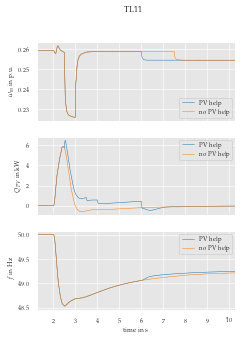

In [4]:
Fig, (ax1,ax2,ax4) = plt.subplots(3,1, figsize =(9*cm,12.5*cm), sharex=True) 
Fig.suptitle('TL11')
# Loop over some different simulation results stored in different trj files
for name in names:
    ext = pyramses.extractor(directory+name+".trj")
    data = pd.DataFrame(data = ext.getSync('G').S.time, columns=["time"])
#     data["pt"] = ext.getBranch('TxMAIN').PF.value*1000
    data["wm"] = ext.getInj('TL11').wm.value
    data["Q_pv"] = ext.getInj('PV11').Qgen.value*1000
    # data["P"] = ext.getInj('TL11').P.value*1000
    data["f"] = ext.getSync('G').S.value*50
    # data["f"] = ext.getInj('TL11').f.value
    

#     ax1 = sns.lineplot(ax=ax1, y="pt", x="time", data=data,linewidth=0.5)
    ax1 = sns.lineplot(ax=ax1, y="wm", x="time", data=data,linewidth=0.5, label="\detokenize{"+name+"}")
    ax2 = sns.lineplot(ax=ax2, y="Q_pv", x="time", data=data,linewidth=0.5, label="\detokenize{"+name+"}")
    # ax3 = sns.lineplot(ax=ax3, y="P", x="time", data=data,linewidth=0.5, label="\detokenize{"+name+"}")
    ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5, label="\detokenize{"+name+"}")


    # Legend

# Plot results for ATL Share
# Axis labels
ax1.set_ylabel(r'$\omega_m$ in p.u.')
ax2.set_ylabel(r'$Q_{PV}$ in kW')
# ax3.set_ylabel(r'P in kW')
ax4.set_ylabel(r'$f$ in Hz')
ax4.set_xlabel(r"time in s")


# Axis limits
ax1.set_xlim([1.25,10.25])
ax2.set_xlim([1.25,10.25])
# ax3.set_xlim([1.25,10.25])
ax4.set_xlim([1.25,10.25])
plt.savefig('.\\' + str(today) + '\\' + 'values comparison.pdf',bbox_inches='tight')



AttributeError: '_getInjClass' object has no attribute 'f'

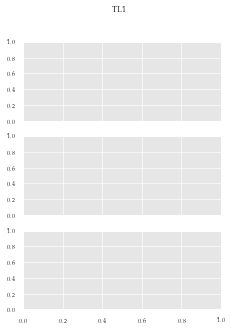

In [5]:

for i, atl in enumerate(atls):
    i, (ax2,ax3,ax4) = plt.subplots(3,1, figsize =(9*cm,12.5*cm), sharex=True) 
    i.suptitle(atl)
    # Loop over some different simulation results stored in different trj files
    for name in names:
        ext = pyramses.extractor(directory+name+".trj")
        data = pd.DataFrame(data = ext.getSync('G').S.time, columns=["time"])
    #     data["pt"] = ext.getBranch('TxMAIN').PF.value*1000
        data["wm"] = ext.getInj(atl).wm.value
        data["patl"] = ext.getInj(atl).P.value*1000
        data["f"] = ext.getInj(atl).f.value
    #     ax1 = sns.lineplot(ax=ax1, y="pt", x="time", data=data,linewidth=0.5)
        ax2 = sns.lineplot(ax=ax2, y="wm", x="time", data=data,linewidth=0.5, label=name)
        ax3 = sns.lineplot(ax=ax3, y="patl", x="time", data=data,linewidth=0.5, label=name)
        ax4 = sns.lineplot(ax=ax4, y="f", x="time", data=data,linewidth=0.5, label=name)

       
        # Legend
    ax2.legend()
    # Plot results for ATL Share
    # Axis labels
    # ax1.set_ylabel(r'$P_t$ in kW')
    ax2.set_ylabel(r'$\omega_m$ in p.u.')
    ax3.set_ylabel(r'$P_{atl}$ in kW')
    ax4.set_ylabel(r'$f$ in Hz')
    ax4.set_xlabel(r"time in s")


    # Axis limits
    # ax1.set_xlim([-0.25,5.25])
    ax2.set_xlim([-0.25,4.25])
    ax3.set_xlim([-0.25,4.25])
    ax4.set_xlim([-0.25,4.25])

    plt.savefig('.\\' + str(today) + '\\' + atl + '.pdf')
   
    
 